In [1]:
import json
import pandas

json_data = json.load(open("../data/recipes.json"))
malts = pandas.json_normalize(json_data, "malts", ["style"], record_prefix="malt_")

In [2]:
# Pick a style
style_malts = malts[malts["style"].isin(["Pale Ale", "Amerikanisches Pale Ale"])]
# style_malts["malt_kind"].value_counts()[:10]

malt_ratio = style_malts.groupby("malt_kind")['malt_amount_percent'].agg(['min', 'max', 'mean', 'count'])
malt_ratio = malt_ratio[malt_ratio['count'] > 3] # Filter low amount of data points
malt_ratio.sort_values(by='count', ascending=0).head(20)

,min,max,mean,count
malt_kind,,,,
pale ale,0.000000,100.000000,69.840546,149
pilsner,4.901961,100.000000,55.646338,113
wiener,6.930693,100.000000,42.554298,57
sauer,0.892857,9.090909,3.137253,48
weizen hell,3.846154,50.092764,16.079900,36
carahell,1.818182,20.000000,7.256714,36
münchner,1.785714,88.000000,19.648646,32
karamell hell,2.439024,22.880952,9.172533,29
haferflocken,1.162791,12.987013,4.828750,23


In [3]:
top_malts = style_malts["malt_kind"].value_counts()[:20].index.values
style_top_malts = style_malts[style_malts['malt_kind'].isin(top_malts)] # Get only the values of the mostly used malts
# style_top_malts.loc[:, ["malt_kind", "malt_amount_percent"]]

<AxesSubplot:xlabel='malt_kind', ylabel='malt_amount_percent'>

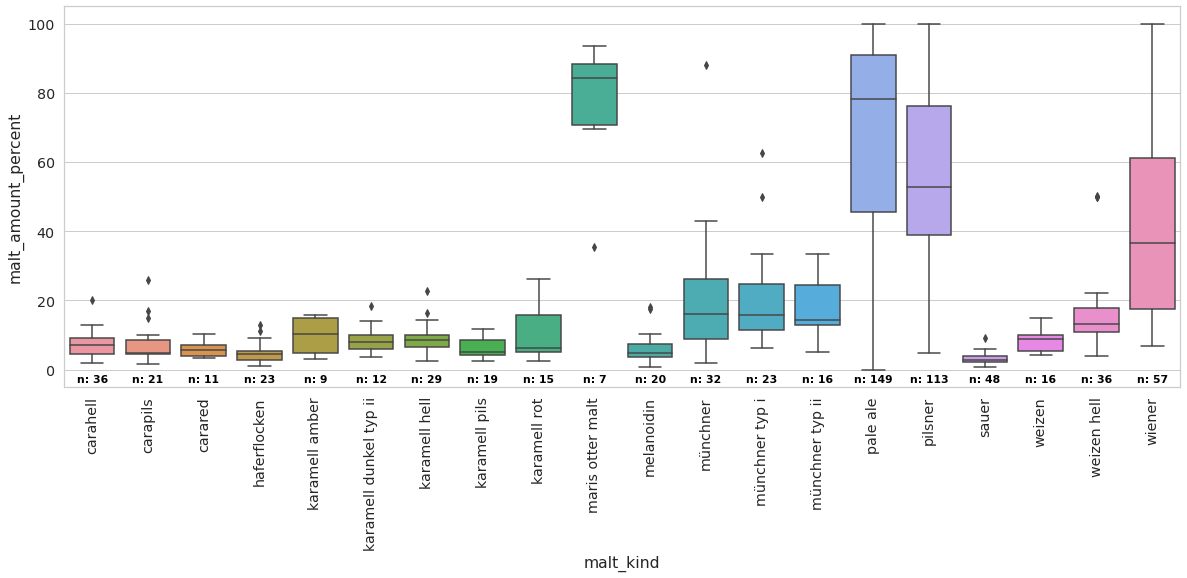

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
sns.set(style="whitegrid", font_scale=1.3)

style_top_malts = style_top_malts.sort_values(["malt_kind"]).reset_index(drop=True)

# Calculate number of obs per group
nobs = style_top_malts.groupby("malt_kind")["malt_kind"].agg(["count"]).sort_values(["malt_kind"]).reset_index(drop=True)['count'].values
nobs = [str(x) for x in nobs]
nobs = ["n: " + i for i in nobs]

plot = sns.boxplot(x=style_top_malts["malt_kind"], y=style_top_malts["malt_amount_percent"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

pos = range(len(nobs))
for tick, label in zip(pos, plot.get_xticklabels()):
    plot.text(pos[tick], -3.5, nobs[tick],
        horizontalalignment='center', size='x-small', color='black', weight='semibold')

plot

In [5]:
# style_top_malts.boxplot(by="malt_kind", column=["malt_amount_percent"], rot=90, fontsize=14, figsize=[10, 6])